<a href="https://colab.research.google.com/github/Vignashwarr/Diabetics-Prediction-Using-Machine-Learning/blob/main/Customer_ChurnDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Upload your dataset file from local (from Kaggle download)
from google.colab import files
uploaded = files.upload()

# Read the uploaded CSV file (adjust filename if needed)
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Basic info about data
df.info()

# Statistical summary
df.describe()

# Check for missing values
df.isnull().sum()

# Display unique values of each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [ ]:
# Convert 'TotalCharges' to numeric (some non-numeric entries cause errors)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle missing values (replace with median)
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())



/tmp/ipython-input-4018647272.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='coolwarm')


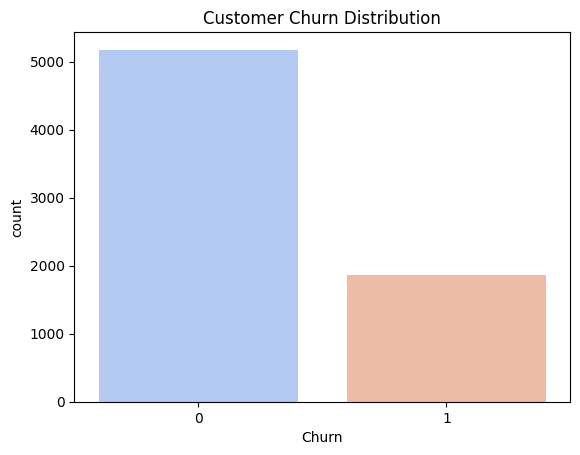

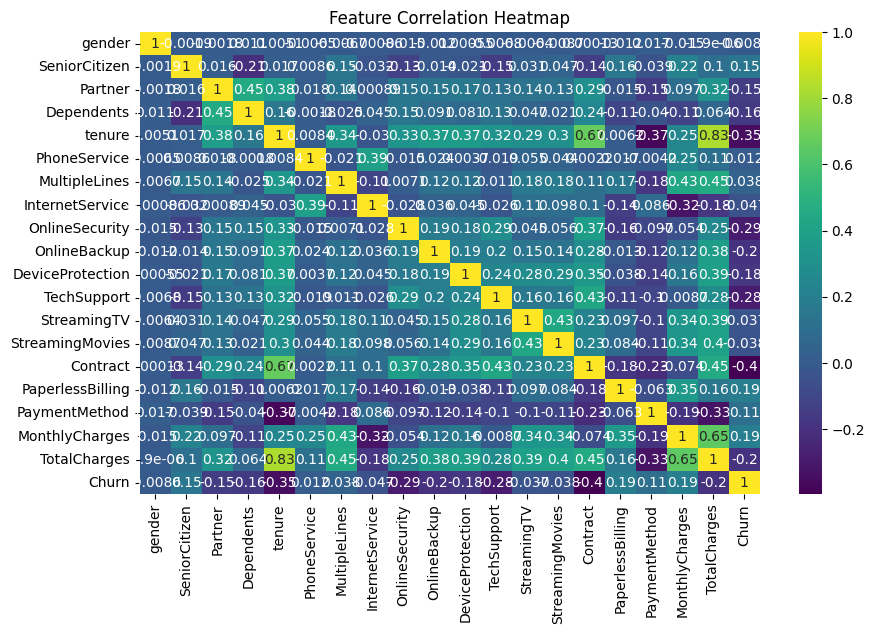

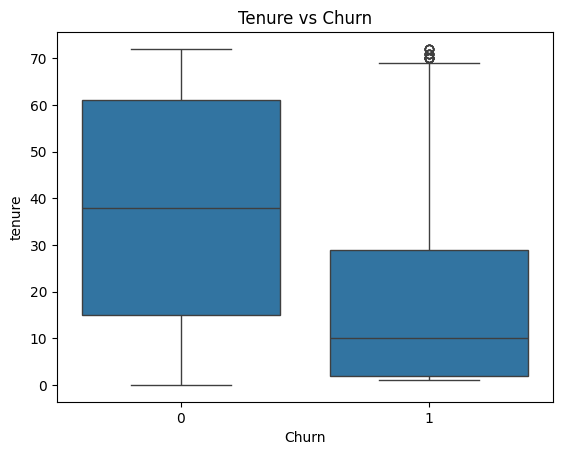

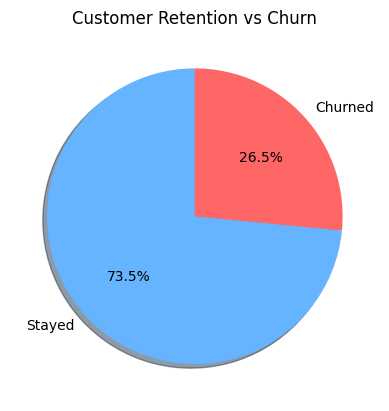

In [ ]:
# Count plot for Churn
sns.countplot(data=df, x='Churn', palette='coolwarm')
plt.title('Customer Churn Distribution')
plt.show()

# Correlation heatmap (numerical only)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')
plt.title('Feature Correlation Heatmap')
plt.show()

# Tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

#Gives a simple visual of how many customers stay vs. leave.
labels = ['Stayed', 'Churned']
sizes = [df['Churn'].value_counts()[0], df['Churn'].value_counts()[1]]
colors = ['#66b3ff','#ff6666']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, shadow=True)
plt.title('Customer Retention vs Churn')
plt.show()


In [ ]:
# Encode categorical variables using LabelEncoder
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
# Define features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))


🔹 Logistic Regression Accuracy: 0.815471965933286


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


🔹 Random Forest Accuracy: 0.7963094393186657


Logistic Regression Report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

 Random Forest Report 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



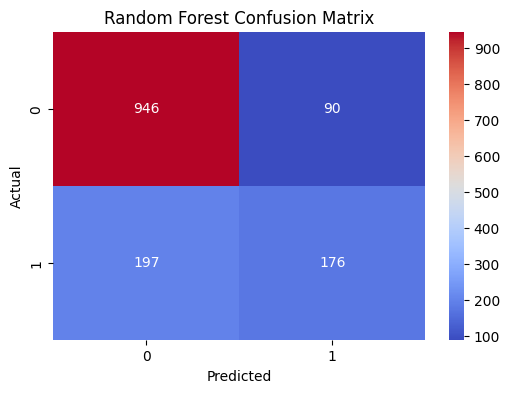

In [ ]:
# Compare both models
print("Logistic Regression Report")
print(classification_report(y_test, y_pred_log))

print(" Random Forest Report ")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='coolwarm')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Example new customer data (replace values)
new_customer = pd.DataFrame({
    'gender': [1],
    'SeniorCitizen': [0],
    'Partner': [1],
    'Dependents': [0],
    'tenure': [5],
    'PhoneService': [1],
    'MultipleLines': [0],
    'InternetService': [1],
    'OnlineSecurity': [0],
    'OnlineBackup': [1],
    'DeviceProtection': [1],
    'TechSupport': [0],
    'StreamingTV': [1],
    'StreamingMovies': [1],
    'Contract': [0],
    'PaperlessBilling': [1],
    'PaymentMethod': [2],
    'MonthlyCharges': [70],
    'TotalCharges': [350]
})

new_customer_scaled = scaler.transform(new_customer)
prediction = rf_model.predict(new_customer_scaled)

print("🔹 Predicted Churn:", "Yes" if prediction[0] == 1 else "No")


🔹 Predicted Churn: Yes


In [ ]:
import joblib

# Save model and scaler
joblib.dump(rf_model, 'churn_prediction_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("✅ Model saved successfully!")



✅ Model saved successfully!
